# Day 18

In [1]:
from aocd import get_data
from inspect import cleandoc
from IPython.display import display, Markdown

def answer(x):
    display(Markdown(f"**Answer** = {x}"))

data = get_data(year=2023, day=18)

In [2]:
import ipytest
import pytest

ipytest.autoconfig()

## Part 1

In [3]:
from dataclasses import dataclass
from enum import Enum
from math import atan2, copysign
from typing import Self
from itertools import product


@dataclass(frozen=True)
class Point:
    x: int
    y: int

    def __add__(self, other: Self) -> Self:
        if isinstance(other, Point):
            return Point(self.x + other.x, self.y + other.y)
        else:
            return NotImplemented

    def __sub__(self, other: Self) -> Self:
        return Point(self.x - other.x, self.y - other.y)

    def __neg__(self) -> Self:
        return Point(-self.x, -self.y)

    def __mul__(self, k: int) -> Self:
        return Point(self.x * k, self.y * k)

    __rmul__ = __mul__

    def __abs__(self) -> int:
        return abs(self.x) + abs(self.y)

    def angle(self) -> float:
        return -atan2(self.x, self.y)


class Direction(Point, Enum):
    N = (0, -1)
    S = (0, 1)
    E = (1, 0)
    W = (-1, 0)
    U = (0, -1)
    D = (0, 1)
    R = (1, 0)
    L = (-1, 0)

    def __neg__(self):
        return Direction(-self.value)


@dataclass
class Rectangle:
    min: Point
    max: Point

    def __iter__(self):
        return product(range(self.min.x, self.max.x + 1), range(self.min.y, self.max.y + 1))

In [4]:
example = cleandoc("""
R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)
""")

In [5]:
from itertools import accumulate, chain
from more_itertools import windowed
import re

@dataclass(frozen=True)
class DigPlanStep:
    direction: Direction
    distance: int

    @classmethod
    def parse(cls, text):
        direction, distance, _ = text.split(" ")
        return cls(Direction[direction], int(distance))

    @classmethod
    def parse2(cls, text):
        DIRECTIONS = [Direction.R, Direction.D, Direction.L, Direction.U]
        m = re.search(r"\(#([0-9a-f]+)([0-9a-f])\)", text)
        return cls(DIRECTIONS[int(m.group(2), 16)], int(m.group(1), 16))
        

@dataclass(frozen=True)
class DigPlan:
    steps: list[DigPlanStep]

    @classmethod
    def parse(cls, text):
        return cls([
            DigPlanStep.parse(line)
            for line in text.split("\n")
        ])

    @classmethod
    def parse2(cls, text):
        return cls([
            DigPlanStep.parse2(line)
            for line in text.split("\n")
        ])


@dataclass(frozen=True)
class Trench:
    points: list[Point]
    bounds: Rectangle

    @classmethod
    def build(cls, dig_plan):
        points = list(accumulate(dig_plan.steps, lambda x, step: x + step.direction * step.distance, initial=Point(0, 0)))
        bounds = Rectangle(
            Point(min(p.x for p in points), min(p.y for p in points)),
            Point(max(p.x for p in points), max(p.y for p in points)),
        )
        return cls(points, bounds)

    def volume(self):
        return abs(sum(
            p1.x * p2.y - p2.x * p1.y + abs(p1 - p2)
            for p1, p2 in windowed(self.points, 2)
        )) // 2 + 1

example_trench = Trench.build(DigPlan.parse(example))
example_trench.volume()

62

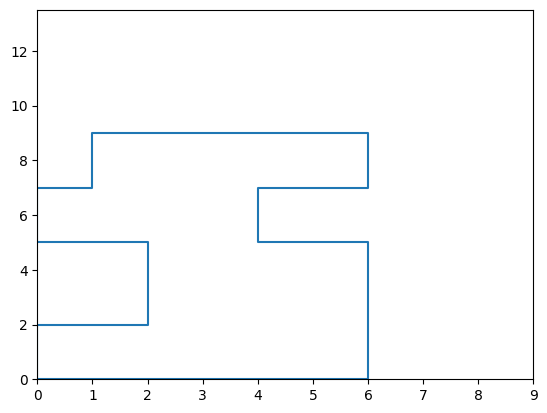

In [6]:
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D

def draw_trench(trench):
    fig = figure()
    ax = fig.add_subplot()
    ax.set_xlim(trench.bounds.min.x, trench.bounds.max.x*1.5)
    ax.set_ylim(trench.bounds.min.y, trench.bounds.max.y*1.5)
    ax.add_line(Line2D([p.x for p in trench.points], [p.y for p in trench.points]))

draw_trench(example_trench)

In [7]:
dig_plan = DigPlan.parse(data)
data_trench = Trench.build(dig_plan)
answer(data_trench.volume())

**Answer** = 49897

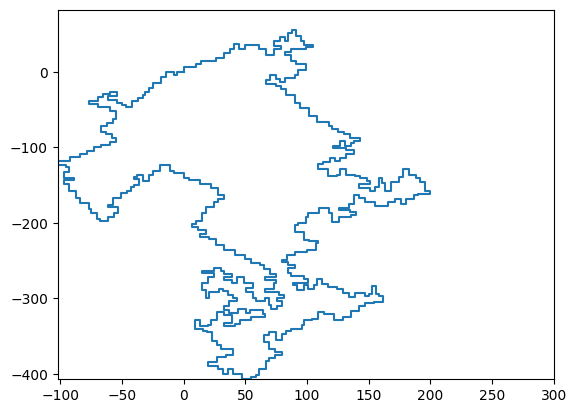

In [8]:
draw_trench(data_trench)

## Part 2

In [9]:
example_trench2 = Trench.build(DigPlan.parse2(example))

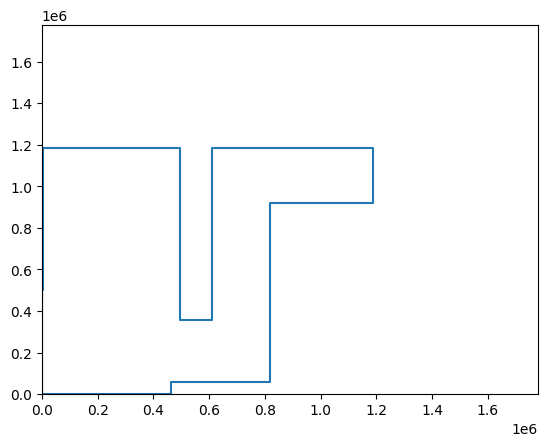

In [10]:
draw_trench(example_trench2)

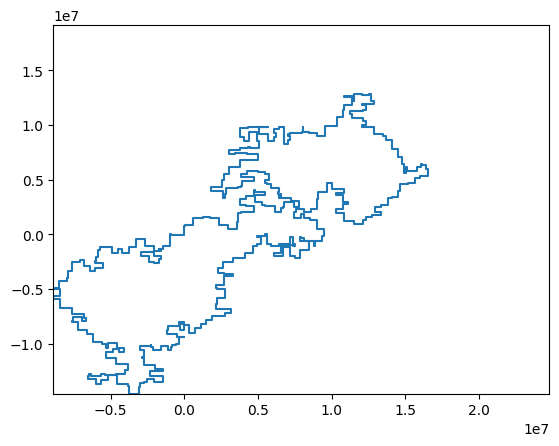

In [11]:
data_trench2 = Trench.build(DigPlan.parse2(data))
draw_trench(data_trench2)

In [12]:
answer(data_trench2.volume())

**Answer** = 194033958221830